In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ant Colony Optimization


## Introcudtion to Swarm Intelligence

   Swarm intelligence is an artificial or natural intelligence technique. It is based on studying collective behavior in decentralized and self-organized systems. It simulates the social structures and interactions of the swarm rather than the structure of an individual in traditional artificial intelligence. The individuals can be regarded as agents with simple and single abilities. Some of them have the ability to evolve themselves when dealing with certain problems to make better compatibility
   
   There are various intelligence examples in nature such as Ant colonies, Bee beehives, Fish schooling, Bird flocking, Bacterial growth, and microbial intelligence. Swarm intelligence has many biological advantages. For example, birds steal information using up to a fifth less energy than those that fly solo. In addition, Swarm intelligence is modeled for the purpose of understanding microscopic (global) transformations. Furthermore, it allows getting ideas for artificial systems the similar proprieties.
   
  Swarm intelligence system usually consists of a group of simple individuals autonomously controlled by a plain set of rules and local interactions. These individuals are not necessarily unwise, but are relatively simple compared to the global intelligence achieved through the system. Some intelligent behaviors never observed in a single individual will soon emerge when several individuals begin cooperate or compete. The swarm can complete the tasks that a complex individual can do while having high robustness and flexibility and low cost. Swarm intelligence takes the full advantage of the swarm without the need of centralized control and global model, and provides a great solution for large-scale sophisticated problems.
    

## Intcoduction to Ant Colony Optimization

Ant Colony Optimization (ACO) technique is purely inspired from the foraging behaviour of ant colonies, first introduced by Marco Dorigo in the 1990s. Ants are insects that prefer community survival and sustaining rather than as individual species. They communicate with each other using sound, touch and pheromone. Pheromones are organic chemical compounds secreted by the ants that trigger a social response in members of same species. These are chemicals capable of acting like hormones outside the body of the secreting individual, to impact the behaviour of the receiving individuals. Since most ants live on the ground, they use the soil surface to leave pheromone trails that may be followed (smelled) by other ants. To get the food, ants use the shortest path available from the food source to the colony. Now ants going for the food secret the pheromone and other ants follow this pheromone to follow the shortest route. 

Since more ants use the shortest route so the concentration of the pheromone increase and the rate of evaporation of pheromone to other paths will be decreased. the more the ants go on a way, the more alluring the way becomes for back to back ants. Moreover, an ant utilizing a short course to a sustenance source will come back to the home sooner and, consequently, stamp its way twice, before the landing of different ants. This straight forwardly impacts the choice likelihood for the following insect leaving the home to search for food. After some time, as more ants are fit to finish the shorter course. Hence on shorter ways pheromone gathers speedier and the more extended ways' pheromones decrease.

Ant colonies have a built-in optimization capability: by the use of probabilistic rules based on local information they
can find the shortest path between two points in their environment.  It is possible to design artificial ants that, by moving on a graph modeling the double bridge, find the shortest path between the two nodes corresponding to the nest and to the food source.

In computer science and operations research, the ant colony optimization algorithm is a probabilistic technique for solving computational problems which can be reduced to finding good paths through graphs. Artificial ants stand for multi-agent methods inspired by the behavior of real ants. The pheromone-based communication of biological ants is often the predominant paradigm used.
<p style="font-weight:bold">The essential idea of an ACO model is that good solutions are not the result of a sporadic good approach to the problem but the incremental output of good partial solutions item. </p>



## Math concepts used in Ant Colony Optimization


### 1. Graphs

A graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects are represented by abstractions called vertices (also called nodes or points) and each of the related pairs of vertices is called an edge (also called link or line).

A graph is a pair $G = (V, E)$, where $V$ is a set whose elements are called vertices (singular: vertex), and $E$ is a set of unordered pairs
${\displaystyle \{v_{1},v_{2}\}}$ of vertices, whose elements are called edges (sometimes links or lines).

There are different types of graphs, including, but not limited to:
* Undirected Graphs: A graph in which edges have no direction
* Directed Graphs: A graph in which edges have a direction
* Weighted Graphs: A graph in which edges have weights or costs associated with them.
* Unweighted Graphs: A graph in which edges have no weights or costs associated with them.
* Trees: A connected graph with no cycles.

A graph can be represented using either an Adjecency Matrix or an Adjecency List.
* An adjacency matrix is a way of representing a graph as a matrix of boolean (0’s and 1’s).
![adjacency matrix](images/matrix.jpg)
* An array of Lists is used to store edges between two vertices. The size of array is equal to the number of vertices (i.e, n). An adjacency list is a way of representing a graph where each vertex (node) has a list of adjacent vertices. This list shows which vertices are directly connected to each vertex via edges.
![adjacency_list](images/list.png)


Graphs play a crucial role in the context of Ant Colony Optimization (ACO). ACO algorithms operate on weighted graphs. The ant colony and food source act as vertices, while the paths represent the edges. Pheromone values associated with the edges serve as weights. 

### 2. Probability, statistics and pheromone calculations in Ant Colony Optimization

ACO algorithms are probabilistic in nature. They rely on probabilities to guide ants’ decision-making during their search for optimal solutions. Ants probabilistically choose paths based on the concentration of pheromone trails left by other ants. The more pheromone a trail has, the higher chance it has to be taken by the ant. ACO balances between exploring new paths and exploiting known good paths. The use of probabilities in choosing paths ensures a mixture of both strategies. Statistical measures like mean and variance of path lengths can help monitor this balance and adjust parameters accordingly.

An ant will move from node $i$ to node $j$ with probability:
$$ p_{i,j}^k =  \frac{(\tau_{i,j}^\alpha)(\eta_{i,j}^\alpha)}{\sum_{l\in N_i^n}(\tau_{i,l}^\alpha)(\eta_{i,l}^\alpha)} $$

Where:
* $p_{i,j}^k$ is the probability that that ant $k$ will move from node $𝑖$ to node $j$
* $\tau_{i,j}$ is the amount of pheromone on edge $i, j$
* $\eta_{i,j}$ is a heuristic value, indicating the desirability of the edge based on some predefined criteria related to the problem being solved. $i,j$
* $\alpha$ and $\beta$ are parameters that control the relative importance of pheromone versus heuristic value.
* $ N_i^k $ is the set of nodes that ant $k$ can move to from node $i$

The probabilistic values are stored in a probabilistic matrix $p_{i,j}^{(n)}$, while the pheromone values are stored in a pheromone matrix $\tau_{i,j}^{(n)}$

At run-time, ACO algorithms try to update the pheromone values in such a way that the probability to generate high-quality solutions increases over time. There are two main phases of pheromone updates - pheromone evaporation and pheromone deposition.


#### Pheromone Evaporation
Pheromone evaporation is applied to all edges in the graph to simulate it's natural evaporation over time. After all the ants have constructed their tours, the pheromone trails are updated. This is done by first lowering the pheromone value on all arcs by a constant factor, and then adding pheromone on the arcs the ants have crossed in their tours. Pheromone evaporation is implemented by The amount of pheromone on each edge is updated according to the equation:

$$ \tau_{i,j} \leftarrow(1-\rho)\tau_{i,j} \;,\; \forall(i,j)\in L$$

Where:
* $\tau_{i,j}$ is the amount of pheromone on a given edge $i,j$
* $\rho$ is the rate of pheromone evaporation $\left(0<\rho<1\right)$

If an arc is not chosen by the ants, its associated pheromone value decreases exponentially in the number of iterations.


#### Pheromone Deposition
After evaporation, ants deposit new pheromones on the edges they have used in their solutions. The amount of pheromone deposited typically depends on the quality of the solution. Better solutions deposit more pheromone.


$$ \tau_{i,j} \leftarrow\tau_{i,j} + \sum_{k=1}^m\Delta\tau_{i,j}\;,\; \forall(i,j)\in L$$

$\Delta\tau_{i,j}$ is the amount of pheromone deposited. $\Delta\tau_{i,j}$ =  $1/L_k$ if ant $n$ travels edge $i,j$, where $L_k$ is the length of the tour, taken by the ant, or $0$ if it doesn't travel that edge


These are the formulas end details for the classic Ant Colony Optimization algorithm, named Ant System (AS). With time, different forms of ACO were introduced, using different formulas for the pheromone evaporation and deposition and focusing of different aspects of the algorithm, like different distribution of exploration versus exploatation probability when traversing the routes. Some newer types of ACO algorithms include, but are not limited to, Ant Colony System, Max-Min Ant System, Elitist Ant System and others. They all work in a similar way but have some key differences.

## Algorithm overview

So far we have defined the key concepts of the Ant Colony Optimization:
* Pheromone Trails: Ants deposit pheromones on paths they traverse. Higher pheromone concentrations indicate more frequently traveled paths.
* Heuristic Information: This represents the desirability of a move, based on problem-specific information (e.g., distance between cities in TSP).
* Probabilistic Decision Making: Ants probabilistically choose paths based on pheromone concentration and heuristic information.


The initial schedule is constructed by taking into account heuristic information, initial pheromone setting and, if several routes are applicable, a self-created selection procedure chooses the task to process. The same process is followed during the whole run time. Path’s attractive raises with path choice and probability increases with the number of times that the same path was chosen before. At the same time, the employment of heuristic information can guide the ants towards the most promising solutions. The algorithm of the standard ACO is as follows:
1. Initialize the pheromone table.
2. Randomly allocate ants to every node.
3. Every ant walk to next node, depending on the probability distribution (local search).
4. Compute the length of the path traveled by each ant,and allocate a quantity amount of pheromone and visibility to the path, according to the length of its path.
5. Perform a local update.
6. Compute whether a better solution is obtained in this time step than the last; if so, then perform a global update on the solution
7. Repeat steps 2 to 6.


Here is a classic example of ACO algorithm using pseudocode:
```
Initialize pheromone levels on all edges
For each iteration:
    For each ant:
        Initialize the starting node
        While the tour is not complete:
            Select the next node probabilistically based on pheromone levels and heuristic information
            Move to the selected node and update the tour
        Complete the tour and calculate the tour length
    Update the pheromone levels on all edges
        Evaporate pheromones
        Deposit pheromones based on the quality of the solutions found by the ants
Return the best solution found
```

## Different variants of Ant Colony Optimization

### 1. Ant Colony System (ACS)

In ACS only the globally best ant (i.e., the ant which constructed the shortest tour from the beginning of the trial) is allowed to deposit pheromone. This choice, together with the use of the pseudo-random-proportional rule, is intended to make the search more directed: ants search in a neighborhood of the best tour found up to the current iteration of the algorithm. 

Global updating is performed after all ants have completed their tours. The pheromone level is updated by applying the global updating rule:

$$ \tau_{i,j} \leftarrow (1-\rho)  \tau_{i,j} + \rho  \Delta\tau_{i,j} $$

$\tau_{i,j} = (L_{gb})^{-1}$, if $i, j$ $\in$ global-best-tour ; 
$\tau_{i,j} = 0$ otherwise

$0 < \rho < 1$ is the pheromone decay level and $L_{gb}$ is the length of the globally best tour from the beginning of the trial

The equation dictates that only those edges belonging to the globally best tour will receive reinforcement. While building a solution, ants visit edges and change their pheromone level by applying a local updating rule:

$$ \tau_{i,j} \leftarrow (1- \xi)\tau_{i,j} + \xi\tau_0 $$

Where $\xi$ is the local pheromone dacay and $\tau_0$ is the initial pheromone level. In this way ants will make a better use of pheromone information: without local updating all ants would search in a narrow neighborhood of the best previous tour.

These enhancements aim to strike a better balance between exploration and exploitation, leading to improved performance in solving combinatorial optimization problems. ACS has since become one of the most influential and widely used algorithms within the field of Ant Colony Optimization (ACO).

### 2. MAX - MIN Ant System (MMAS)

Research on ACO has shown that improved performance may be obtained by a stronger exploitation of the best solutions found during the search and the search space analysis in the previous section gives an explanation of this fact. Yet, using a greedier search potentially aggravates the problem of premature stagnation of the search. Therefore, the key to achieve best performance of ACO algorithms is to combine an improved exploitation of the best solutions found during the search with an effective mechanism for avoiding early search stagnation. MAX –MIN Ant System, which has been specifically developed to meet these requirements, differs in three key aspects from the classic Ant System:
* To exploit the best solutions found during an iteration or during the run of the algorithm, after each iteration only one single ant adds pheromone. This ant may be the one which found the best solution in the current iteration (iteration-best ant) or the one which found the best solution from the beginning of the trial (global-best ant)
* To avoid stagnation of the search the range of possible pheromone trails on each solution component is limited to an interval $[\tau_{min},\tau_{max}]$.
* Additionally, we deliberately initialize the pheromone trails to $\tau_{max}$, achieving in this way a higher exploration of solutions at the start of the algorithm.

In MMAS only one single ant is used to globally update the pheromone trails after each
iteration. The pheromone update rule is:
 
$$ \tau_{i,j}(t+1) = \rho\tau_{i,j}(t) + \Delta\tau_{i,j}^{best} $$

$ \Delta\tau_{i,j}^{best} = 1/f(s^{best}) $ and $ f(s^{best}) $ denotes the cost of the iteration-best solution

To avoid a situation of stagnation, where most ants only take one route. r. This can happen if at each choice point, the pheromone trail is significantly higher for one choice than for all the others. To avoid such stagnation, a limit $[\tau_{min},\tau_{max}]$ is implemented, so that pheromone values can't go below $\tau_{min}$ and above $\tau_{max}$

MMAS emphasizes exploitation more heavily than exploration. By limiting the range of pheromone levels, MMAS encourages ants to exploit the best-known paths more effectively while still allowing for some degree of exploration.

### 3. Elitist Ant System (EAS)

The Elitist Ant System introduces a mechanism to strengthen the influence of the best solutions found so far, thereby enhancing the algorithm's ability to converge to high-quality solutions. After all ants have completed their tours, the pheromone trails are updated similarly to the standard Ant System. However, EAS adds an additional update from the best ant (elitist ant), which is the ant that has found the best solution since the start of the algorithm. This additional pheromone deposit reinforces the best solution more strongly than other solutions found during the same iteration. In EAS, an additional term is added to the pheromone update formula to account for the pheromone deposited by the elite ant:

$$ \tau_{i,j} \leftarrow(1-\rho)\tau_{i,j} + \sum_{k=1}^m\Delta\tau_{i,j}^k + e\Delta\tau_{i,j}^e $$

Where $e$ is the number of elite ants (often set to 1), and $\Delta\tau_{i,j}^e$ is the pheromone deposited by an elite ant.

By allowing the best ant to deposit extra pheromone, EAS reinforces the best-known solutions more strongly than classic Ant System. This can lead to faster convergence towards high-quality solutions but also increases the risk of premature convergence to suboptimal solutions.

## Ant Colony Optimization implementation for solving The Travelling Salesman Problem

### Travelling Salesman Problem (TSP) overview

Given a set of cities and the distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point. TSP was first formulated in 1930 and is one of the most intensively studied problems in optimization. It is used as a benchmark for many optimization methods. Even though the problem is computationally difficult, many heuristics and exact algorithms are known, so that some instances with tens of thousands of cities can be solved completely.

There are obviously a lot of different routes to choose from, but finding the best one — the one that will require the least distance or cost — is what mathematicians and computer scientists have spent decades trying to solve.

It’s much more than just an academic problem in graph theory. Finding more efficient routes using route optimization algorithms increases profitability for delivery businesses, and reduces greenhouse gas emissions because it means less distance traveled.

In theoretical computer science, the TSP has commanded so much attention because it’s so easy to describe yet so difficult to solve. The TSP is known to be a combinatorial optimization problem that’s an $NP$-hard problem, which means that the number of possible solution sequences grows exponential with the number of cities

### Implementation

To implement the TSP, we need to first define a few parameters like a pheromone matrix, points, number of ants and iterations, $\alpha$ and $\beta$ factors for calculating the probability, pheromone decay after every iteration and the amount of pheromone, deposited by each ant, going on a route ($Q$).

We will need to define a few functions, working with each other to construct and show the final solution.

#### calculate_distance_matrix:

In [57]:
def calculate_distance_matrix(points):
    """
    Calculates the distance matrix for a given set of points.
    Parameters:
        points (numpy.ndarray): A 2D array where each row represents a point in n-dimensional space.
    Returns a 2D array where element (i, j) represents the distance between point i and point j.
    """
    n_points = len(points)
    dist_matrix = np.zeros((n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):
            if i != j:
                dist_matrix[i][j] = np.linalg.norm(points[i] - points[j])
    return dist_matrix

It first initializes a suqare matrix with sizes $n_{points}$, then calculates the Euclidean distance between each pair $(i,j)$ of points, using the numpy function $linalg.norm()$, and fills the matrix with them. The distance is only calculated if $i \neq j$, because a point's distance to itself is zero.

Euclidean distance: $d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{k=1}^{n} (a_k - b_k)^2}$

#### select_next_point:


In [58]:
def select_next_point(current_point, pheromone, distances, visited, alpha, beta):
    """
    Selects the next point for an ant to visit based on the pheromone levels and distances to unvisited points.
    Parameters:
        current_point - the point where the ant is at at the moment;
        pheromone - the pheromone matrix;
        distances - the distances matrix;
        visited - a boolean array indicating which points have been visited;
        alpha and beta - the pheromone trail and heuristic value relative importance.
    Outputs the next point the and will move to

    """
    unvisited = np.where(np.logical_not(visited))[0]
    probabilities = np.zeros(len(unvisited))
    
    for i, unvisited_point in enumerate(unvisited):
        probabilities[i] = (pheromone[current_point, unvisited_point] ** alpha) * \
                           ((1.0 / distances[current_point, unvisited_point]) ** beta)
    
    probabilities_sum = np.sum(probabilities)
    if probabilities_sum == 0:
        probabilities = np.ones(len(unvisited)) / len(unvisited)
    else:
        probabilities /= probabilities_sum
    
    next_point = np.random.choice(unvisited, p=probabilities)
    return next_point

The function first identifies the indices of unvisited points:
```
unvisited = np.where(np.logical_not(visited))[0]
```

**np.logical_not(visited)** applies a logical NOT operation to the visited array, flipping True to False and vice versa. **np.where()** returns the indices of the array where the condition is $True$. The **[0]** at the end, dictates that an array with indices will be returned. If it is not present, then a tuple of arrays of indices will be returned.

The function initializes a probabilities array of zeros with the length of the unvisited points array. Then it calculates each probability using the ACO probability calculation formula. In the end, the ant chooses a random point from the unvisited array, based on the probabilities array.

#### construct_solution:

In [59]:
def construct_solution(points, n_ants, pheromone, distances, alpha, beta):
    """
    Simulates the behavior of all ants constructing their paths.
    Parameters:
        points - the array of points;
        n_ants - the number of ants, used in the simulation;
        pheromone - the current pheromone matrix;
        distances - the distances matrix;
        alpha and beta - the pheromone trail and heuristic value relative importance.
    Outputs a list of paths taken by each ant and a list of their lengths.
    """
    n_points = len(points)
    paths = []
    path_lengths = []
    
    for ant in range(n_ants):
        visited = [False] * n_points
        current_point = np.random.randint(n_points)
        visited[current_point] = True
        path = [current_point]
        path_length = 0
        
        while False in visited:
            next_point = select_next_point(current_point, pheromone, distances, visited, alpha, beta)
            path.append(next_point)
            path_length += distances[current_point, next_point]
            visited[next_point] = True
            current_point = next_point
        
        path_length += distances[current_point, path[0]]
        paths.append(path)
        path_lengths.append(path_length)
    
    return paths, path_lengths


For each ant, the function initializes an array visited to keep track of visited points and randomly selects a starting point. The ant constructs a path by repeatedly selecting the next point using select_next_point function until all points are visited , appends each point to a **path** list and adds the length to **path_length**. An ant's path is completed by returning to the starting point adding the final length.

#### update_pheromones:

In [60]:
def update_pheromones(pheromone, paths, path_lengths, evaporation_rate, Q):
    """
    Updates the pheromone levels on the paths based on the solutions found by the ants.
    Parameters:
        pheromone - the current pheromone matrix;
        paths - a list with the paths, found by the ants;
        path_lengths - the lengths of each path from the paths list;
        evaporation_rate - the rate at which the pheromone evaporates after each iteration;
        Q - the amount of pheromone deposited by an ant when passing through a path.
    Outputs the updated pheromone matrix.
    """
    
    n_points = pheromone.shape[0]
    pheromone *= (1 - evaporation_rate)
    
    for path, path_length in zip(paths, path_lengths):
        for i in range(n_points - 1):
            pheromone[path[i], path[i + 1]] += Q / path_length
        pheromone[path[-1], path[0]] += Q / path_length
    
    return pheromone

The function first applies evaporation to all pheromone values from the matrix by multiplying them by the evaporation rate, which is a value between 0 and 1. After that it increases the pheromone levels on the paths taken by the ants, with the amount $Q$, divided by the length of the path. This leads to more pheromone being deposited on the shorter paths.

**pheromone.shape[0]** gives the size of the square matrix. It is used to get the range, used to iterate through all values of the pheromone matrix.

#### plot_best_path:

In [61]:
def plot_best_path(points, best_path, is_3d=False):
    """
    Visualizes the best path found by the Ant Colony Optimization (ACO) algorithm. It can handle both 2D and 3D points.
    Parameters:
        points - the array of points;
        best_path - A list of indices representing the best path found by the ACO algorithm;
        is_3d - a boolean indicating if the function will plot in a 2D or 3D space. It is set to 2D by default.
    """
    if is_3d:
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')
        
        for i in range(len(best_path) - 1):
            ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                    [points[best_path[i],1], points[best_path[i+1],1]],
                    [points[best_path[i],2], points[best_path[i+1],2]],
                    c='g', linestyle='-', linewidth=2, marker='o')
        
        ax.plot([points[best_path[-1],0], points[best_path[0],0]],
                [points[best_path[-1],1], points[best_path[0],1]],
                [points[best_path[-1],2], points[best_path[0],2]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
        ax.set_xlabel('X Distance')
        ax.set_ylabel('Y Distance')
        ax.set_zlabel('Z Distance')
    else:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(points[:,0], points[:,1], c='r', marker='o')
        
        for i in range(len(best_path) - 1):
            ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                    [points[best_path[i],1], points[best_path[i+1],1]],
                    c='g', linestyle='-', linewidth=2, marker='o')
        
        ax.plot([points[best_path[-1],0], points[best_path[0],0]],
                [points[best_path[-1],1], points[best_path[0],1]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
        ax.set_xlabel('X Distance')
        ax.set_ylabel('Y Distance')
    
    plt.title("Best Path Found by Ant Colony Optimization")
    plt.show()

The function first checks if the **is_3d** input is set to either True or False to determine the plotting space dimensions.

For a 3D space, the functions creates a 3D plot using **plt.figure** and **add_subplot** with **projection='3d'**. The points are then scattered across the space and each path is plotted by iterating through the **best_path** list and closes the path by one final plot connecting the first and the last point.

For a 2D space, a 2D plot is created through **plt.subplots** and the points are scattered across it. The paths are plotted in the same way as in the 3D space, except the points only have two coordinates ($x$ and $y$), instead of three.

The function provides a helpful visual representation of the solution found by the algorithm, making it easier to understand and analyze the results.

#### ant_colony_optimization:

In [62]:
def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    """
    This is the main function that orchestrates the Ant Colony Optimization process.
    Parameters:
        points - the array of points;
        n_ants - the number of ants, used in the simulation;
        n_iterations - the number of iterations the algorithm runs;
        alpha and beta - the pheromone trail and heuristic value relative importance;
        evaporation_rate - the rate at which the pheromone evaporates after each iteration;
        Q - the amount of pheromone deposited by an ant when passing through a path.
    """
    n_points = len(points)
    distances = calculate_distance_matrix(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf
    
    for iteration in range(n_iterations):
        paths, path_lengths = construct_solution(points, n_ants, pheromone, distances, alpha, beta)
        
        shortest_path = min(paths, key=lambda x: path_lengths[paths.index(x)])
        shortest_path_length = min(path_lengths)
        
        if shortest_path_length < best_path_length:
            best_path = shortest_path
            best_path_length = shortest_path_length
        
        pheromone = update_pheromones(pheromone, paths, path_lengths, evaporation_rate, Q)
    
    print(f"Best path: {best_path}")
    print(f"Best length: {best_path_length}")
    plot_best_path(points, best_path, points.shape[1] == 3)

We first calculate the number of points, by the length of the points array. Then we initialize the distance matrix with the help of the **calculate_distance_matrix** function and fill the pheromone matrix, which size is equal to the number of points, with ones. Variables **best_path = None** and **best_path_length = np.inf** are initialized to store the global best solution. The length is initialized as infinite, so that the first iteration always gives a better result.

A number of iterations are made, based on the input, given to the function. Each iteration initializes paths and path lengths lists, using the **construct_solution** function.

**shortest_path = min(paths, key=lambda x: path_lengths[paths.index(x)])** takes the shortest path, by applying the **min** function and using a $key$ argument, to specify a function to be called on each list element before comprasion. In this case a  $lambda$ function is used, which takes a path **x** and returns its length. The shortest path length is calculated easier by just getting the $min$ element from the path_lengths list.

If the iteration shortest path is shorter than the global shortest one, then the global path and its length get updated to be equal to the iteration best. At the end of the iteration, the pheromone matrix is updated using the **update_pheromones** function.

In the end the best solution result is printed and plotted.


### Showcase

Best path: [9, 2, 6, 5, 0, 7, 4, 3, 1, 8]
Best length: 3.5889022948188254


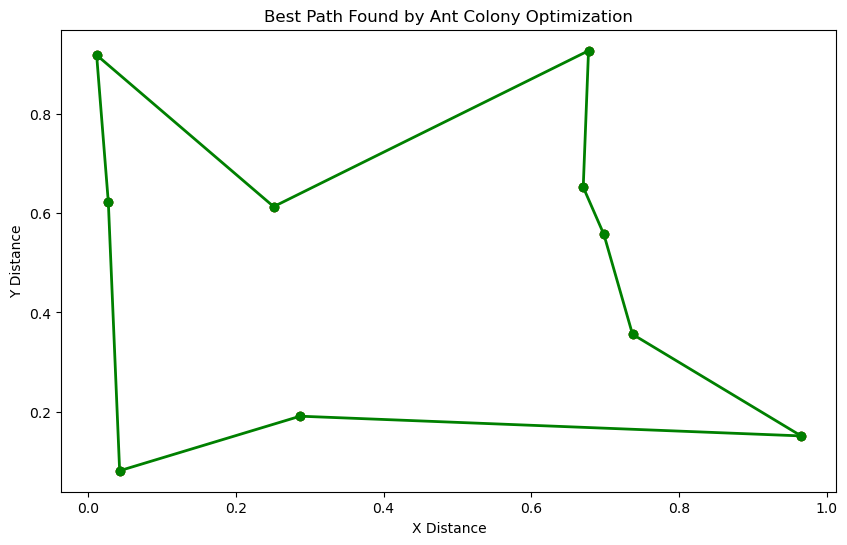

In [63]:
points = np.random.rand(10, 2)  # Generate 10 random 2D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

Best path: [30, 2, 35, 13, 28, 6, 36, 8, 29, 40, 18, 37, 9, 24, 3, 47, 10, 26, 41, 39, 7, 15, 16, 34, 31, 21, 27, 23, 48, 11, 19, 1, 14, 33, 25, 0, 17, 44, 46, 45, 20, 22, 5, 12, 4, 38, 49, 43, 42, 32]
Best length: 7.504014656064257


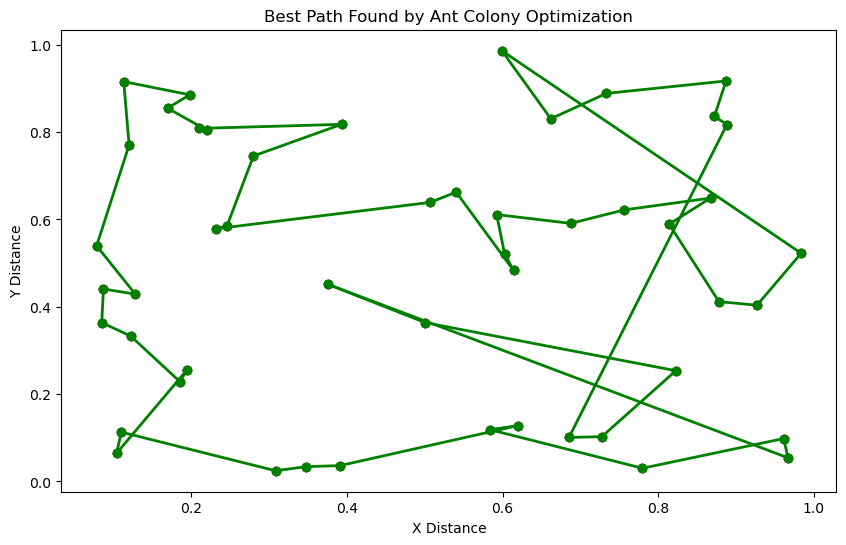

In [64]:
points = np.random.rand(50, 2)  # Generate 50 random 2D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=0.5, evaporation_rate=0.5, Q=1)

Best path: [20, 43, 29, 37, 5, 24, 27, 22, 3, 45, 23, 49, 2, 8, 32, 10, 7, 34, 33, 1, 28, 21, 26, 15, 13, 42, 48, 38, 30, 46, 4, 17, 11, 9, 31, 35, 39, 25, 0, 40, 12, 47, 16, 18, 14, 36, 41, 19, 44, 6]
Best length: 16.293886489809207


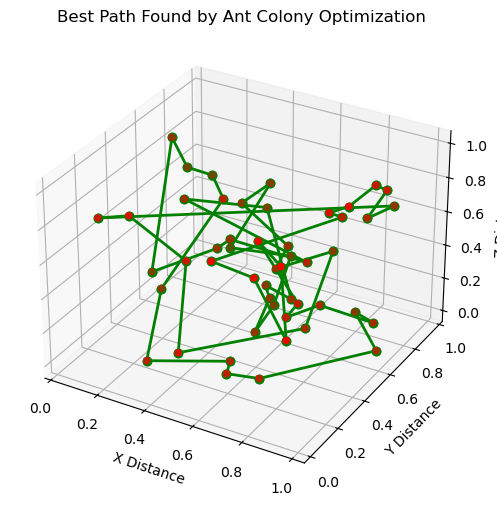

In [65]:
points = np.random.rand(50, 3)  # Generate 50 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=0.5, evaporation_rate=0.5, Q=1)

This implementation represents an Ant System solution. It provides a practical demonstration of  for solving TSP in 3D space, showcasing how artificial ants can collectively find optimal or near-optimal solutions by mimicking the pheromone-based pathfinding behavior of real ants.

Increasing the number of points, iterations and ants leads to a better solution, but costs a lot more computational time. This algorithm has quite high time complexity , being $O(n^2×n_{ants}×n_{iterations})$, making it uneffective for large graphs with big number of ants. 

The algorithm doesn't always give the best solutions, because of its probabilistic nature, however, it still finds a solution that is close to the best. We can see here that by simulating the same points and solving the tsp for both of them, we get a different solution both times. 

Best path: [3, 5, 7, 2, 1, 0, 4, 6, 8]
Best length: 258.243888279404


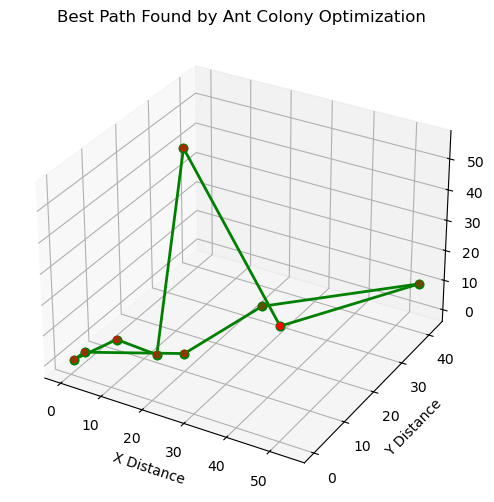

In [66]:
points_3d = np.array([
    [0, 1, 0],
    [1, 3, 1],
    [20, 10, 2],
    [50, 0, 33],
    [10, 2, 10],
    [54, 42, 10],
    [14, 9, 0],
    [24, 30, 1],
    [11, 22, 55]
])

ant_colony_optimization(points_3d, n_ants=1, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

Best path: [6, 4, 0, 1, 8, 3, 5, 2, 7]
Best length: 276.598412382894


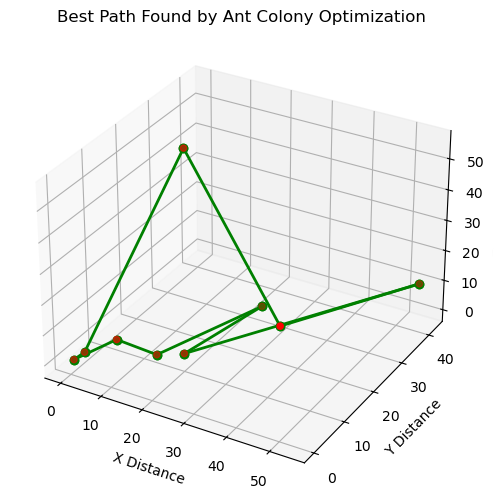

In [67]:
points_array = np.array([
    [0, 1, 0],
    [1, 3, 1],
    [20, 10, 2],
    [50, 0, 33],
    [10, 2, 10],
    [54, 42, 10],
    [14, 9, 0],
    [24, 30, 1],
    [11, 22, 55]
])

ant_colony_optimization(points_3d, n_ants=1, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

### Ant Colony System implementation

To solve the TSP using Ant Colony System, a few changes have to be made. First of all, in the Ant Colony System a local pheromone update is made every time an ant moves from one point to another. A new function will be made for that purpose:

#### local_pheromone_update:

In [68]:
def local_pheromone_update(pheromone, current_point, next_point, rho, initial_pheromone):
    """
    Updates the pheromone levels on the path an ant just traveled locally. 
    The idea is to slightly reduce the pheromone level to encourage exploration of other paths by subsequent ants.
    Parameters:
        pheromone - the pheromone matrix;
        current_point - the index of the current point the ant is at;
        next_point - the index of the point the ant wants to move to;
        rho - the local pheromone decay coefficient;
        initial_pheromone - the initial pheromone level, used to reset the pheromone partially.
    """
    pheromone[current_point, next_point] = (1 - rho) * pheromone[current_point, next_point] + rho * initial_pheromone

The pheromone level on the edge from **current_point** to **next_point** is calculated using the formula:
$$ \tau_{i,j} \leftarrow (1- \rho)\tau_{i,j} + \rho\tau_0 $$

#### select_next_point:

In [69]:
def select_next_point(current_point, pheromone, distances, visited, alpha, beta, q_0):
    """
    Selects the next point (city) an ant should move to, balancing between exploitation (choosing the best-known path) 
    and exploration (probabilistically choosing a path).
    Parameters:
        current_point - index of the current point the ant is at;
        pheromone - the pheromone matrix;
        distances - the distance matrix;
        visited - a boolean array, indicating which points have been visited;
        alpha and beta - the importance of pheromone levels and heuristic information;
        q_0 - a threshold for balancing exploitation and exploration.
    Outputs the selected next point of the ant's route.
    """
    unvisited = np.where(np.logical_not(visited))[0]
    if np.random.rand() < q_0:
        # Exploitation: choose the best path
        next_point = max(unvisited, key=lambda point: pheromone[current_point, point] * ((1.0 / distances[current_point, point]) ** beta))
    else:
        # Exploration: choose the path probabilistically
        probabilities = np.zeros(len(unvisited))
        for i, point in enumerate(unvisited):
            probabilities[i] = (pheromone[current_point, point] ** alpha) * ((1.0 / distances[current_point, point]) ** beta)
        probabilities /= probabilities.sum()
        next_point = np.random.choice(unvisited, p=probabilities)
    return next_point

The probabilistic approach to choosing the next point is the same as the classic Ant System - we calculate the probability array using the ACO formula and then choose a point from the unvisited array.

A new approach is also introduced - a deterministic one. The function takes a **q_0** parameter, where $0 \le q_0 \le 1 $. A random number between $0$ and $1$ is chosen and if it is lower than **q_0**, then the deterministic approach is chosen and the next point is selected based on the best path. The higher q_0 is, the more often the deterministic approach is chosen.

By using **max(unvisited, key=lambda point: pheromone[current_point, point] ** alhpa * ((1.0 / distances[current_point, point]) ** beta))**, the algorithm ensures that the next point selected is the one that maximizes the desirability function defined by the lambda function. The $key$ argument is a $lambda$ function, which takes each point of the unvisited array and computes a pheromone value, used to determine the best next point. The purpose of this line is to implement the exploitation part of the ACS, where the ant deterministically chooses the next point that has the highest combined pheromone and heuristic value. This is akin to choosing the "greedy" or most promising path based on current information.

#### construct_solution:

In [70]:
def construct_solution(points, n_ants, pheromone, distances, alpha, beta, rho, initial_pheromone, q_0):
    """
    Constructs tours for all ants by having each ant visit all points
    exactly once, applying local pheromone updates during the construction.
    Parameters:
        points - the array of points;
        n_ants - the number of ants;
        pheromone - the pheromone matrix;
        distances - the distance matrix;
        alpha and beta - 
        the importance of pheromone levels and heuristic information;
        rho - the local pheromone decay coefficient;
        initial_pheromone - the initial pheromone level, used to reset the pheromone partially;
        q_0 - a threshold for balancing exploitation and exploration.
    Outputs an array of paths and an array of their lengths.
    """
    
    n_points = len(points)
    paths = []
    path_lengths = []
    
    for ant in range(n_ants):
        visited = [False] * n_points
        current_point = np.random.randint(n_points)
        visited[current_point] = True
        path = [current_point]
        path_length = 0
        
        while False in visited:
            next_point = select_next_point(current_point, pheromone, distances, visited, alpha, beta, q_0)
            path.append(next_point)
            path_length += distances[current_point, next_point]
            visited[next_point] = True
            
            # Local pheromone update
            local_pheromone_update(pheromone, current_point, next_point, rho, initial_pheromone)
            
            current_point = next_point
        
        path_length += distances[current_point, path[0]]
        paths.append(path)
        path_lengths.append(path_length)
    
    return paths, path_lengths

The only difference this function has, compared to the Ant System one, is that it performs a local pheromone update for every step an ant makes.

#### global_pheromone_update:

In [71]:
def global_pheromone_update(pheromone, best_path, best_path_length, evaporation_rate, Q):
    """
    Updates the pheromone levels globally based on the best path found during the current iteration.
    Parameters:
        pheromone - the pheromone matrix;
        best_path - the best path found during the current iteration;
        best_path_length - the length of best_path;
        evaporation_rate - the global pheromone evaporation rate;
        Q - the amount of pheromone deposited by an ant when passing through a path.
    """
    pheromone *= (1 - evaporation_rate)
    for i in range(len(best_path) - 1):
        pheromone[best_path[i], best_path[i + 1]] += Q / best_path_length
    pheromone[best_path[-1], best_path[0]] += Q / best_path_length

First, the pheromone levels on all edges are evaporated by **(1 - evaporation_rate)**. Then, pheromone is added to the edges of the best path in proportion to the inverse of the path length, reinforcing the best solution found.


#### ant_colony_system:

In [72]:
def ant_colony_system(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q, rho, q_0):
    """
    This is the main function that orchestrates the Ant Colony System optimization proccess.
    Parameters:
        points - the array of points;
        n_ants - the number of ants, used in the simulation;
        n_iterations - the number of iterations the algorithm runs;
        alpha and beta - the pheromone trail and heuristic value relative importance;
        evaporation_rate - the rate at which the pheromone evaporates after each iteration;
        Q - the amount of pheromone deposited by an ant when passing through a path;
        rho - the local pheromone decay coefficient;
        initial_pheromone - the initial pheromone level, used to reset the pheromone partially;
        q_0 - a threshold for balancing exploitation and exploration.
    """
    n_points = len(points)
    distances = calculate_distance_matrix(points)
    initial_pheromone = 1.0 / (n_points * np.mean(distances))
    pheromone = np.ones((n_points, n_points)) * initial_pheromone
    best_path = None
    best_path_length = np.inf
    
    for iteration in range(n_iterations):
        paths, path_lengths = construct_solution(points, n_ants, pheromone, distances, alpha, beta, rho, initial_pheromone, q_0)
        
        shortest_path = min(paths, key=lambda x: path_lengths[paths.index(x)])
        shortest_path_length = min(path_lengths)
        
        if shortest_path_length < best_path_length:
            best_path = shortest_path
            best_path_length = shortest_path_length
        
        # Global pheromone update only for the best path
        global_pheromone_update(pheromone, best_path, best_path_length, evaporation_rate, Q)
    
    print(f"Best path: {best_path}")
    print(f"Best length: {best_path_length}")
    plot_best_path(points, best_path, points.shape[1] == 3)

The function is almost identical to the **ant_colony_optimization** function defined earlier, but has a few extra parameters (**rho**, **initial_pheromone** and **q_0**) and also performs a global pheromone update only for the best path, instead of all paths. The **plot_best_path**, **calculate_distance_matrix** functions don't change.

### Showcase

Best path: [5, 14, 4, 7, 6, 8, 18, 1, 16, 13, 15, 17, 19, 2, 0, 9, 3, 10, 12, 11]
Best length: 7.260331927905821


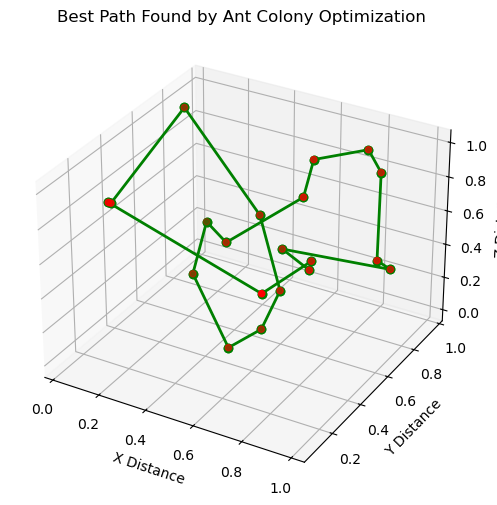

In [73]:
points = np.random.rand(20, 3)
ant_colony_system(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1, rho=0.1, q_0=0.6)

Best path: [4, 25, 0, 14, 21, 13, 7, 11, 23, 15, 24, 26, 22, 27, 2, 8, 6, 16, 17, 1, 5, 12, 3, 18, 20, 29, 10, 9, 28, 19]
Best length: 7.030559534956319


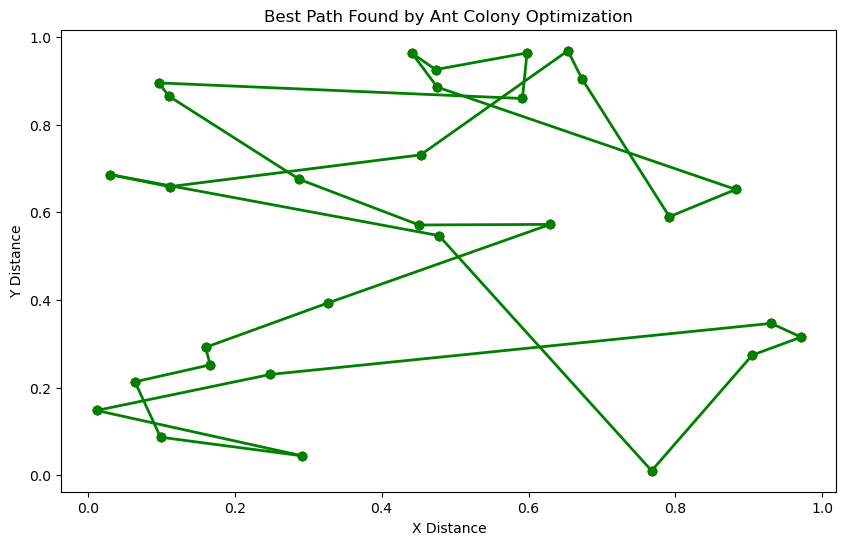

In [74]:
points = np.random.rand(30, 2)
ant_colony_system(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.9, Q=1, rho=0.1, q_0=0.1)

Best path: [22, 24, 21, 4, 17, 15, 9, 13, 1, 11, 16, 6, 0, 3, 5, 14, 18, 20, 25, 28, 10, 8, 7, 2, 23, 19, 12, 29, 27, 26]
Best length: 5.6894740379327935


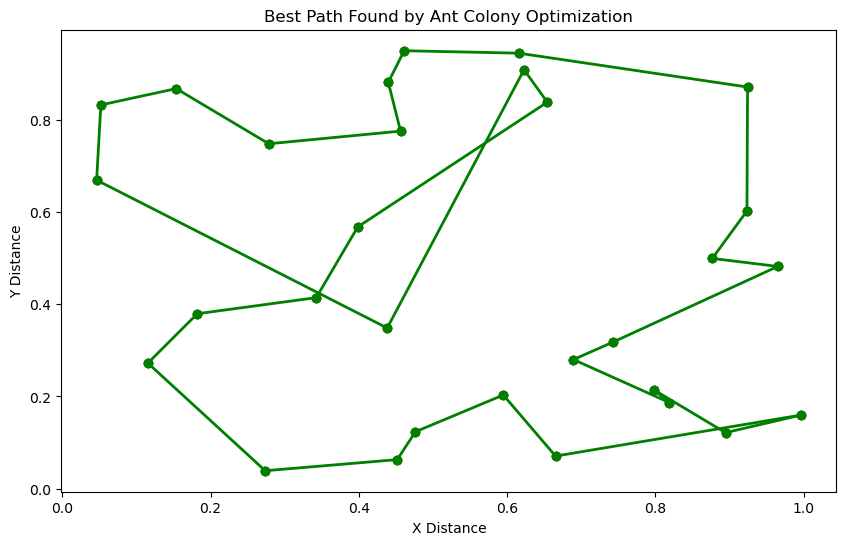

In [75]:
points = np.random.rand(30, 2)
ant_colony_system(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.99, Q=1, rho=0.5, q_0=0.9)

### MAX - MIN Ant System Implementation

To implement MMAS, the algorithm must change, so that the pheromone values always stay within the minimum $\tau_{min}$ and maximum $\tau_{max}$ bounds.

The pheromone values will be initialized with the highest value $\tau_{max}$ and after pheromone updates, the less desirable paths will lose more pheromone than the more desirable ones.

#### local_pheromone_update:

In [76]:
def local_pheromone_update(pheromone, current_point, next_point, rho, tau_max):
    pheromone[current_point, next_point] = (1 - rho) * pheromone[current_point, next_point] + rho * tau_max

Updates the pheromone level on the edge using $\tau_{max}$, ensuring the pheromone values are reinforced with the maximum allowed value during the local update. This is consistent with MMAS principles to maintain pheromone levels within specified bounds. The function takes an additional parameter **tau_max**.

#### global_pheromone_update:

In [81]:
def global_pheromone_update(pheromone, best_path, best_path_length, evaporation_rate, Q, tau_min, tau_max):
    pheromone *= (1 - evaporation_rate)
    for i in range(len(best_path) - 1):
        pheromone[best_path[i], best_path[i + 1]] += Q / best_path_length
    pheromone[best_path[-1], best_path[0]] += Q / best_path_length

    np.clip(pheromone, tau_min, tau_max, out = pheromone)

The only difference here is that the function takes two additional parameters - **tau_min** and **tau_max**, which restrict the pheromone values to an interval, by using **np.clip(pheromone, tau_min, tau_max)**. This line equalizes values, lower than the interval, to **tau_min** and values, higher than it, to **tau_max**.

#### construct_solution:

In [78]:
def construct_solution(points, n_ants, pheromone, distances, alpha, beta, rho, tau_max, q_0):
    n_points = len(points)
    paths = []
    path_lengths = []
    
    for ant in range(n_ants):
        visited = [False] * n_points
        current_point = np.random.randint(n_points)
        visited[current_point] = True
        path = [current_point]
        path_length = 0
        
        while False in visited:
            next_point = select_next_point(current_point, pheromone, distances, visited, alpha, beta, q_0)
            path.append(next_point)
            path_length += distances[current_point, next_point]
            visited[next_point] = True
            
            # Local pheromone update using tau_max
            local_pheromone_update(pheromone, current_point, next_point, rho, tau_max)
            
            current_point = next_point
        
        path_length += distances[current_point, path[0]]
        paths.append(path)
        path_lengths.append(path_length)
    
    return paths, path_lengths

The function takes **tau_max** paramterer instead of **initial_pheromone** and passes it to **local_pheromone_update()**. Other than that, the function is identical.

#### max_min_ant_system:

In [79]:
def max_min_ant_system(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q, rho, q_0, tau_max, tau_min):
    n_points = len(points)
    distances = calculate_distance_matrix(points)
    pheromone = np.ones((n_points, n_points)) * tau_max
    best_path = None
    best_path_length = np.inf
    
    for iteration in range(n_iterations):
        paths, path_lengths = construct_solution(points, n_ants, pheromone, distances, alpha, beta, rho, tau_max, q_0)
        
        shortest_path = min(paths, key=lambda x: path_lengths[paths.index(x)])
        shortest_path_length = min(path_lengths)
        
        if shortest_path_length < best_path_length:
            best_path = shortest_path
            best_path_length = shortest_path_length
        
        # Global pheromone update only for the best path
        global_pheromone_update(pheromone, best_path, best_path_length, evaporation_rate, Q, tau_min, tau_max)
    
    plot_best_path(points, best_path, points.shape[1] == 3)
    
    return best_path, best_path_length

Just like the Ant Colony System, the MAX-MIN Ant System updates the pheromone levels locally on every ant movement and globally after every iteration. The function takes two additional parameters **tau_min** and **tau_max**, which are passed to some of the nested functions. The only difference is that the initial pheromone on all edges is set to **tau_max**.

### Elitist Ant System

The Elitist Ant System is similar to the classic Ant System, but is designed to find high-quality solutions faster, by leveraging the best solutions found during the search process. In addition to the regular pheromone updates done by all ants, the best ant (often called the elite ant) from the current or previous iterations is given extra weight in the pheromone update. The best ant is usually determined by the shortest tour length found either in the current iteration or since the beginning of the algorithm. This elite ant deposits extra pheromone, which significantly influences the pheromone trails and guides other ants toward high-quality solutions.

#### Implementation

To implement the Elitist Ant System, a change must be made to the global pheromone update of the classic Ant System to include the elitist ant pheromone deposit

In [ ]:
def global_pheromone_update(pheromone, paths, path_lengths, best_path, best_path_length, evaporation_rate, Q, e):
    pheromone *= (1 - evaporation_rate)
    
    # Update pheromone based on all ants
    for k, path in enumerate(paths):
        for i in range(len(path) - 1):
            pheromone[path[i], path[i + 1]] += Q / path_lengths[k]
        pheromone[path[-1], path[0]] += Q / path_lengths[k]
    
    # Additional update by elite ant
    for i in range(len(best_path) - 1):
        pheromone[best_path[i], best_path[i + 1]] += e * Q / best_path_length
    pheromone[best_path[-1], best_path[0]] += e * Q / best_path_length


The function takes one additional parameter **e**, which is the number of elite ants. After the global pheromone update, based on all ants

There are many other possible ways to complete the Travelling Salesman Problem, including Genetic Algorithms, Greedy Algorithm, Dynamic programming, Brute Force, Tabu Search and others, some with higher and some with lower time complexity, but the Ant Colony Optimization is still a more desirable method than some of them.




## Other applications of Ant Colony Optimization

### 1. Quadratic Assignment Problem (QAP)

The QAP can be described as the problem of assigning n number of facilities to n number of locations with given distances between the locations and given flows between the facilities. It was introduced by Koopmans and Beckmann in
1957 as a mathematical model for the location of a set of indivisible economical activities. The goal then is to place the facilities on locations in such a way that the sum of the product between flows and distances is minimized. 

Although extensive research has been done for more than three decades, the QAP remains one of the hardest optimization problems and no exact algorithm can solve problems of size n > 20 in reasonable computational time.


### 2. Vehicle Routing Problem (VRP)

Vehicle Routing Problem deals with pickup or delivery activity management, which is an
extension of a classic Travelling Salesman Problem. In a VRP, different vehicles travel around a network and all vehicles start and end its tour to the depot point. The main constraint is that each customer should be visited by just
one vehicle

### 3. Feature Selection

Feature selection is a process used in machine learning to select a subset of relevant features (variables, predictors) for use in model construction. It simplifies models to make them easier to interpret, reduces overfitting, and improves model performance by elimintaing redundant data, reducing training time and decreasing complexity.

ACO requires a problem to be represented as a graph. Here nodes represent features, with the edges between them denoting the choice of the next feature. The search for the optimal feature subset is then an ant traversal through the graph where a minimum number of nodes are visited that satisfies the traversal stopping criterion.

### 4. Image Edge Detection

Image edge detection refers to the extraction of the edges in a digital image. It is a process whose aim is to identify points in an image where discontinuities or sharp changes in intensity occur. In conventional approaches, the computation time quickly increases with the size of the image. An ACO-based approach has the potential of overcoming the limitations of conventional methods. Image edge detection can be thought of as a problem of identifying the pixels in an image that correspond to edges. A two-dimensional digital image can be represented as a twodimensional matrix with the image pixels as its elements.

## Summary

Ant colony optimization is a candidate suited for solving dynamic optimization problems due to its ability to adapt to changing environments. As one of the most popular metaheuristics, the ACO algorithm solves various static and dynamic optimization problems. Since most real optimization problems have dynamic and time-varying parameters with a continuous range of values, several ant colony optimization algorithms were developed to deal with dynamic optimization problems.

ACO is still a pretty new algorithm so its application could increase in the following years.

## Resources

Swarm intelligence:
https://www.sciencedirect.com/science/article/pii/S221491471300024X
https://www.baeldung.com/cs/swarm-intelligence

Graphs:
https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)
https://www.geeksforgeeks.org/graph-types-and-applications
https://www.geeksforgeeks.org/graph-and-its-representations

Ant Colony Optimization:
https://www.geeksforgeeks.org/introduction-to-ant-colony-optimization
https://mat.uab.cat/~alseda/MasterOpt/ACO_Intro.pdf
https://visualize-it.github.io/ant_colony_optimization/simulation.html
http://www.iteejournal.org/v8no1feb19_pdf3.pdf

Types of ACO:
https://people.idsia.ch/~luca/acs-ec97.pdf
https://arxiv.org/pdf/2405.15397
https://www.researchgate.net/publication/228800511_Elitist_ant_system_for_route_allocation_problem

Travelling Salesman Problem:
https://en.wikipedia.org/wiki/Travelling_salesman_problem
https://www.geeksforgeeks.org/travelling-salesman-problem-using-dynamic-programming

Applications of ACO:
https://www.ijert.org/research/solving-vehicle-routing-problem-using-ant-colony-optimization-with-nodal-demand-IJERTV4IS090635.pdf - VRP
https://www.researchgate.net/publication/228848216_Image_edge_detection_using_ant_colony_optimization - Image edge detection
https://www.sciencedirect.com/science/article/pii/S0096300306005753 - QAP
https://visualize-it.github.io/ant_colony_optimization/simulation.html - Feature Selection